# Module: Machine Learning and Statistics

# Task 1
#### Calculates and prints to the screen the square root of 2 to 100 decimal places.
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

### Research
First look at simple python code to find a square root.
 

In [1]:
def sqrt2():
    root=2**(1/2)
    return root
print(sqrt2())

1.4142135623730951


by looking at the result it is obvious the decimal places are not 100, to check the number of decimal places use the following code

In [2]:
# To check the number of digits
a=sqrt2()
print(a) # it shows 16 decimal places

split_num = str(a).split('.')
decimal_part = int(split_num[1])
#print(decimal_part)
print( "The number of decimal places: ",len(str(decimal_part)))


1.4142135623730951
The number of decimal places:  16


In [12]:
print(sqrt2())
r=sqrt2()
result = str(r)[2:]# get the number after decimal point
print("The number of decimal places:",len(result))

1.4142135623730951
The number of decimal places: 16


As from the above code, it is obvious that by default ** gives result to 16 decimal places but now next is to look is it possible to get 100 decimal places. look at the floating point documentation as  precision is 100 decimal digits, The float in Python is not designed for this kind of precise calculation.

On searching online come across NASA's calculation of squareroot of 2.<br/>

Than start to look at different algorithms to calculate the  square root of a number.There are different algorithms to get the square root. I looked at following two

1. Newtons Method of Square root
2. Babylonian's method 

<br>both methods can be implemented in python</br>

## The Agorithms to get the square root of a number

### 1.  Newtons Method of Square Root

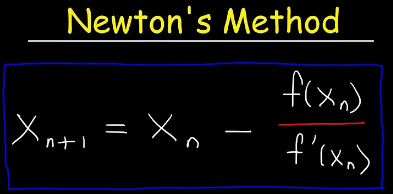

The idea is to start with an initial guess which is reasonably close to the true root, then to approximate the function by its tangent line using calculus, and finally to compute the x-intercept of this tangent line by elementary algebra. This x-intercept will typically be a better approximation to the original function's root than the first guess, and the method can be iterated.

More formally, suppose f : (a, b) → ℝ is a differentiable function defined on the interval (a, b) with values in the real numbers ℝ, and we have some current approximation xn. Then we can derive the formula for a better approximation, xn + 1 by referring to the diagram on the right. The equation of the tangent line to the curve y = f (x) at x = xn is

$\displaystyle y=f'(x_{n})\,(x-x_{n})+f(x_{n}$
where f′ denotes the derivative. The x-intercept of this line (the value of x which makes y = 0) is taken as the next approximation, xn + 1, to the root, so that the equation of the tangent line is satisfied when $\displaystyle (x,y)=(x_{n+1},0)$:

$\displaystyle 0 =f'(x_{n})\,(x_{n+1}-x_{n})+f(x_{n}).$
Solving for $x_{n + 1}$ gives

$\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}.$

In [3]:
def approxSqrt(num):
    guess=num
    error=0.0000001
    diff= 999999
    while diff >error:
        newGuess= guess - ((guess**2-num)/(2*guess))
        
        diff= newGuess - guess
        
        if diff<0:
            diff*=-1
        
        guess=newGuess
        
    return guess
    

In [4]:
approxSqrt(2)

1.4142135623730951

**Newton Raphson Method of Sqareroot:**
1. Take a reasonable guess (approximate root) for the square root.

2. Add the approximate root with the original number divided by the approximate root and divide by 2.

 x_i := (x_i + n / x_i) / 2

3. Continue step 2 until the difference in the approximate root along the iterations is less than the desired value (or precision value).
4. The approximate root is the square root we want.

Reference:https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64#:~:text=Algorithm,root%20and%20divide%20by%202.&text=Continue%20step%202%20until%20the,value%20(or%20precision%20value).

In [21]:
# Returns the square root of n. 
def squareRoot(n): 
        n=n
    # We are using n itself as 
    # initial approximation This 
    # can definitely be improved  
        x = n
        difference = 1
          
        # e decides the accuracy level 
        accuracy = 0.000001
        while(difference > accuracy): 
            x1= (x+(n/x))/2
            difference= x-x1
            x=x1
        print(x)
squareRoot(2)

1.414213562373095


## Babylonian method for square root

Algorithm:
This method can be derived from (but predates) Newton–Raphson method.


1. Start with an arbitrary positive start value x (the closer to the 
   root, the better).
2. Initialize difference = 1.
3. Do following until desired approximation is achieved.
        a) Get the next approximation for root using average of x and y
        b) Set y = n/x
Ref: https://www.geeksforgeeks.org/square-root-of-a-perfect-square/

In [41]:
def sqrt(number):
    x = number
    y=1
    precision = 10**(-15)
    
    while abs(x - y)/abs(x) > precision:
        x=(x+y)/2
        y=number/x
        
    return x
    

In [42]:
sqrt(2)

1.414213562373095

In [14]:
# Function to return the square root of  
# a number using Newtons method  
def squareRoot(n, l) : 
  
    # Assuming the sqrt of n as n only  
    x = n  
  
    # To count the number of iterations  
    count = 0 
  
    while (1) : 
        count += 1 
  
        # Calculate more closed x  
        root = 0.5 * (x + (n / x))  
  
        # Check for closeness  
        if (abs(root - x) < l) : 
            break 
  
        # Update root  
        x = root 
  
    return root  
# source:https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/#:~:text=Let%20N%20be%20any%20number,correct%20square%20root%20of%20N.

In [15]:
squareRoot(2,0.00000001)

1.414213562373095

### Next have a look at available options in python to print 100 decimal Places

In [32]:
#print("{:.100f}".format(r))
r=sqrt2()# use the first sqrt2 code
printResult = format(r, ',.100f')
  
print(printResult)


1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [33]:
# the result is printed to 100 decimal places but there are trailing zeros 
print("Total decimal places",len(str(printResult[2:])))
print(len(str(4142135623730951454746218587388284504413604736328125)))

Total decimal places 100
52


52 decimals are fine with trailing zeros

As finding a squareroot is fine but the number of decimal places is an issue here how to get 100 decimal places as searched on the net it shows that there is a library decimal which can be used to get more decimal places as use of libraries is not allowed for this task but to look at the available option I looked into it 

In [14]:
from decimal import *
getcontext().prec = 101
Decimal(2).sqrt()

Decimal('1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727')

as from the result above it is obvious that it is possible to get result to 100 decimal places but now i move forward that how can i do it without decimal libray

In [15]:
2**0.5

1.4142135623730951

##  Use of ${2 * 10^{200}}$
when looking at different algorithms i found the square root of 2 and squreroot of ${2*10^{2}}$ is same only difference in decimal places so is it possible to get a whole number to 100 digits

- ${2*10^{2} = 14.142135623730951}$
- ${2*10^{4} = 141.42135623730951}$
- ${2*10^{6} = 1414.2135623730951}$
- ${2*10^{8} = 14142.135623730951}$

In [35]:
print(2**0.5)
print((2*10**2)**0.5)
print((2*10**4)**0.5)
print((2*10**6)**0.5)
print((2*10**8)**0.5)
print((2*10**10)**0.5)


1.4142135623730951
14.142135623730951
141.4213562373095
1414.213562373095
14142.13562373095
141421.35623730952


As we see above  if we get 101 integer part long result than put the decimal point in it

### Integer square root of a number
Integer square root of a number is the floor of the square root. To find integer square root of a number. The while condition here would be difference>accuracy. The algorithm terminates when the approximate squared is less than or equal to N.

The iteration relation here is:
${x_{(n+1)} = (x_n + N // x_n) // 2}$ ,
where // is integer division.

In [1]:
# Returns the square root of n. 
def squareRoot(n): 
        n=n*10**200
    # We are using n itself as 
    # initial approximation This 
    # can definitely be improved  
        x = n
        difference = 1
          
        # e decides the accuracy level 
        accuracy = 0.000001
        while(difference > accuracy): 
            x1= (x+(n//x))//2
            difference= x-x1
            x=x1
      
        print(f'{x // 10**100}.{x % 10**100:0100d}') 
        return x

In [52]:
squareRoot(2)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

In [55]:

a="4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
#b="4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
b=squareRoot(2)
print(b)
result = str(b)[1:]
print(len(a))
print("is the nasa 100 decimal places and the calculated above are same")
print(a==result)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
100
is the nasa 100 decimal places and the calculated above are same
True


First try to use simple ** operator to raise the number 2  to power 1/2.

In [54]:
sqrt(2*10**200)

1.414213562373095e+100

In [56]:
def sqrt2(a, digits):
    a = a * (10**(2*digits))
    x_prev = 0
    x_next = 1 * (10**digits)
    while x_prev != x_next:
        x_prev = x_next
        #print(x_prev)
        #x_next = (x_prev + (a // x_prev)) >> 1
        x_next = (x_prev + (a // x_prev)) //2
    #return x_next
    print(f'{x_next // 10**100}.{x_next % 10**100:0100d}')
# modified from source:https://stackoverflow.com/a/5189881

In [57]:
sqrt2(2,100)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


### Conclusion
In start this task was bit complicated as my assumption was that I can use floating point number but as I start working on it and understanding the idea of square root algorithms and implementation in python it become clear that the main problem is to get floating point result to 100 decimal places so I come across the idea of Integer square root.I come across two codes that i modified to get the result. so get the square root of 2*10^200 and than print the result and put . in the digits.

## References:


1.https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation 12/10/2020

2.Approximating Square Roots w/ Newton's Method https://www.youtube.com/watch?v=tUFzOLDuvaE 12/10/2020
3.Look at the format to print 100 decimal places 19/10/2020


## Task 2
The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|   | A  | B  |  C |  D |Total|
|---|---|---|---|---|---|
| White Collar  | 90  | 60  |  104 | 95  |349|
|  Blue Collar |  30 | 50  |  51 |  20 |151|
|  No Collar|  30 |  40 |  45 |  35 |150|
|  Total|  150 |  150 | 200 | 150 |650|

## Chi-squared Test

There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:

1. A chi-square goodness of fit test determines if a sample data matches a population.e.g. Goodness of Fit Test.
2. A chi-square test for independence compares two variables in a contingency table to see if they are related. 
<br>In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    - A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
    - A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

The formula for the chi-square statistic used in the chi square test is:
    $$\chi_c^2 = \sum \frac {(O - E)^2}{E}$$

The chi-square formula.

The subscript “c” are the degrees of freedom. “O” is your observed value and E is your expected value. 

**Chi-square Test is a method that is used to test if there is any relationship between two categorical variables.**
<br><br>
Chi-square test is a test for independence. Therefore, our Hypothesis statements are going to be the following
<br>H0: X and Y are independent.
<br>H1: X and Y are dependent.
<br>X and Y are categoirical variables<br><br>
Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". . You conduct the study and collect the following data:<br><br>
- H0: Each person's neighborhood of residence is independent of the person's occupational classification (Null hypothesis)<br>
- H1: Each person's neighborhood of residence is dependent of the person's occupational classification


When analysis of categorical data is concerned with more than one variable, two-way tables (also known as contingency tables) are employed. These tables provide a foundation for statistical inference, where statistical tests question the relationship between the variables on the basis of the data observed.
The chi-square test is based on a test statistic that measures the divergence of the observed data from the values that would be expected under the null hypothesis of no association. This requires calculation of the expected values based on the data. The expected value for each cell in a two-way table is equal to (row total x column total)/n, where n is the total number of observations included in the table.
Now, let’s calculate the expected value as below formula:
 $$\frac {(total \ rows ) * (total \ columns)}{total \ Observation}$$

…then apply to our contingency table:

### import packages

In [10]:
#import numpy as np
import numpy as np
# import pandas as
import pandas as pd
#import matplotlib.pyplot, it is a Python 2D plotting library
import matplotlib.pyplot as plt
# import seaborn as sns, Seaborn is a library for making statistical graphics in Python
import seaborn as sns
# import scipy.stats as ss
import scipy.stats as ss


### Create the DataFrame

In [2]:
# create the pd data frame
data = {'A':[90, 30, 30], 'B':[60, 50, 40], 'C':[104, 51, 45],'D':[95, 20, 35]} 

df = pd.DataFrame(data, index =['White Collar','Blue Collar','No Collar']) 

print(df)

# Ref: code adopted from https://datatofish.com/create-pandas-dataframe/

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No Collar     30  40   45  35


In [28]:
df.sum()

A    150
B    150
C    200
D    150
dtype: int64

### make a data frame with rows and columns sum of data 

In [19]:
sums = df.select_dtypes(np.number).sum().rename('total')

# append sums to the data frame
df2=df
df2=df2.append(sums)
df2["row sum"] = df2.sum(axis=1)
print(df2)
#ref: https://stackoverflow.com/a/41286765

                A    B    C    D  row sum
White Collar   90   60  104   95      349
Blue Collar    30   50   51   20      151
No Collar      30   40   45   35      150
total         150  150  200  150      650


### calculate the expected values
For chi-squared tests, the term “expected frequencies” refers to the values we’d expect to see if the null hypothesis is true. To calculate the expected frequency for a specific combination of categorical variables (e.g., white-collar workers in neighborhood A), multiply the column total (A) by the row total (White Collar), and divide by the sample size.

Row total X Column total / Sample Size = Expected value for one table cell
Expected table can be calculated using below formula:


To calculate the expected frequency for the white collar/area A cell in our dataset, do the following:

- Find the row total for White Collar (349)
- Find the column total for A (150)
- Multiply those two values and divide by the sample size (650)

$${150\times {\frac {349}{650}}\approx 80.54}$$

If the null hypothesis is true, we’d expect to see 80.54 White Collar in neighbourhood A  in our sample. 

In [20]:
#look at the options to calculate the expected values
print(df2.loc["total"]*349/650)

A           80.538462
B           80.538462
C          107.384615
D           80.538462
row sum    349.000000
Name: total, dtype: float64


In [27]:
# first look at how to manipulate the data in dataframe

first = df.loc["White Collar"]
first_sum= first.sum()
second = df.loc["Blue Collar"]
second_sum= second.sum()
third = df.loc["No Collar"]
third_sum= third.sum()
expected_df=df2
#print(expected_df.loc["White Collar"])
#expected_df= df2.apply(lambda x: x*first_sum/650  if x.name == 'A' else x, axis=1)
# Apply a function to one column and assign it back to the column in dataframe
#expected_df= df2.apply(lambda x: x *first_sum/650  if x.name == 'total' else x)
# creating a list of dataframe columns 
#col=df2.head(3)
arr = df2.values
print(arr)
print("===================")
rowSum = arr[:3,4:5]
arr = arr[:,0:4]
print("Row sum:\n",rowSum)
print(arr)
print("===================")
columnSum= arr[3: ,]
print("Column Sum\n",columnSum)
print(arr)
print("===================")
arr = arr[0:3,0:4]
print(arr)

print("===================")
print("Expected values Table")
result= columnSum * rowSum/650
#result = np.sqrt((arr**2).reshape(arr.shape[0],-1,3).sum(axis=-1))/times[:,None]
#result = pd.DataFrame(result, columns=['Velocity_%s'%(x,) for x in list('AB')])
#source: modified from https://stackoverflow.com/a/20875641
print(result)

[[ 90  60 104  95 349]
 [ 30  50  51  20 151]
 [ 30  40  45  35 150]
 [150 150 200 150 650]]
Row sum:
 [[349]
 [151]
 [150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]
 [150 150 200 150]]
Column Sum
 [[150 150 200 150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]
 [150 150 200 150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]
Expected values Table
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


### Contingency Table with the Expected Values
I’ll calculate the expected values for all 12 cells that represent the combinations of the three Classes and four neighbourhood.


In [28]:
result1 = pd.DataFrame(result, columns=['Expected(%s)'%(x,) for x in list('ABCD')], index =['White Collar','Blue Collar','No Collar']) 
print(result1)

              Expected(A)  Expected(B)  Expected(C)  Expected(D)
White Collar    80.538462    80.538462   107.384615    80.538462
Blue Collar     34.846154    34.846154    46.461538    34.846154
No Collar       34.615385    34.615385    46.153846    34.615385


### Observed values

In [29]:
print(df)

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No Collar     30  40   45  35


### To calculate the chi-squared statistic,
take the difference between a pair of observed (O) and expected values (E), square the difference, and divide that squared difference by the expected value. Repeat this process for all cells in the contingency table and sum those values. The resulting value is χ2. 

In [30]:
arr=df.values
table_result=np.square(arr-result)/result
print(table_result)

[[1.11152744e+00 5.23760194e+00 1.06678422e-01 2.59672324e+00]
 [6.73968416e-01 6.59008321e+00 4.43326541e-01 6.32518254e+00]
 [6.15384615e-01 8.37606838e-01 2.88461538e-02 4.27350427e-03]]


In [33]:
print(table_result.sum())
print("The chi-squared value:",table_result.sum())
 

24.5712028585826
The chi-squared value: 24.5712028585826


The sum of these quantities over all of the cells is the test statistic; in this case,is approx 24.6

###  important considerations about chi-squared values:

Zero represents the null hypothesis. If all your observed frequencies equal the expected frequencies exactly, the chi-squared value for each cell equals zero, and the overall chi-squared statistic equals zero. Zero indicates your sample data exactly match what you’d expect if the null hypothesis is correct.

Squaring the differences ensures both that cell values must be non-negative and that larger differences are weighted more than smaller differences. A cell can never subtract from the chi-squared value.

Larger values represent a greater difference between sample data and the null hypothesis. Chi-squared tests are one-tailed tests rather than the more familiar two-tailed tests. The test determines whether the entire set of differences exceeds a significance threshold. If your χ2 passes the limit, your results are statistically significant! You can reject the null hypothesis and conclude that the variables are dependent–a relationship exists.

### Degree of freedom
For a table with r rows and c columns, the method for calculating degrees of freedom for a chi-square test is (r-1) (c-1). For our example, we have three rows and four columns: (3-1) * (4-1) = 12 df.

### P value
"p" is the probability the variables are independent.
if  p < 0.05, so the result is thought of as being "significant" meaning means variables are not independent.

## calculate using scipy.stats library

In [34]:
# Chi-squared tests of independence determine whether a relationship exists between two categorical variables.
#Row total X Column total / Sample Size = Expected value for one table cell
#Contingency Table with the Expected Values
#sample size=N=650
#The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df.values
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f,\ncritical=%.3f,\nstat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.5f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# source: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]
dof=6
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
probability=0.950,
critical=12.592,
stat=24.571
Dependent (reject H0)
significance=0.050, p=0.00041
Dependent (reject H0)


### Conclusion
The purpose of this task was to understand Chi-squared test statistic and confirmed that the value of the Chi-squared test statistic for the provided contingency table is 24.571. calculating the p-value that is 0.00041 at a significance level of 5%. As p value is less than 0.05 so we can reject the null hypothesis (Each person's neighborhood of residence is independent of the person's occupational classification).<br>
Feature selection always plays a key role in machine learning and Chi-squared test can be used for feature selection.

# Refrences
1. Chi-Square Statistic: How to Calculate It / Distribution https://www.statisticshowto.com/probability-and-statistics/chi-square/
2. How the Chi-Squared Test of Independence Works https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/#:~:text=To%20calculate%20the%20chi%2Dsquared,resulting%20value%20is%20%CF%872.
3. Handling The Chi Square in Statistics with Python https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af
4. Chi-Square Independence Test – What and Why? https://www.spss-tutorials.com/chi-square-independence-test/
5. Fundamental of The Chi Square in Statistics https://medium.com/@nhan.tran/the-chi-square-statistic-p-1-37a8eb2f27bb
6. Calculate Value of The Chi Square https://medium.com/@nhan.tran/the-chi-square-statistic-p-2-92ed4bcefd3
7. Chi-Square Test for Feature Selection in Machine learning https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

## Task 3:
The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation calculation, STDDEV.P and STDDEV.S . The STDDEV.P function performs the above calculation but in the STDDEV.S calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

## Standard Deviation
Standard Deviation is a measure of how spread out numbers are.
Its symbol is σ (the greek letter sigma)
It is the square root of the Variance
## Variance
The Variance is defined as:
The average of the squared differences from the Mean.
Formulas
### Here are the two formulas for standard deviation:

- The "Population Standard Deviation":  	$\displaystyle\sqrt{\frac{1}{N} \sum\limits_{i=1}^{n}{(x_i - \mu)^2 }} $
- The "Sample Standard Deviation":	 	$\displaystyle\sqrt{\frac{1}{N - 1} \sum\limits_{i=1}^{n}{(x_i - \bar{x})^2 }}$
<br>
Looks complicated, but the important change is to divide by N-1 (instead of N) when calculating a Sample Variance.


### Excel Functions
Microsoft Excel has two different versions of the standard deviation calculation, STDDEV.P and STDDEV.S.
1. STDEV.S (S stands for Sample) assumes that its arguments are a sample of the population and formula used is sample standard deviation metioned above
2. If your data represents the entire population, then compute the standard deviation using STDEV.P (P stands for population). and formula used is population standard deviation

### Bessel’s Correction: n-1
#### sample: 
A sample is always a subset of a population it’s intended to represent. Once a sample is taken, there are presumed, hypothetical parameters and distributions built into that sample-representation.
In statistic, we can get some piece of information about a sample (such as a mean, or median) which corresponds to some piece of analogous information about the population.
As increasing sample size increases standard deviation, which converges to the true population standard deviation. Bessel's correction helps smaller samples get larger standard deviations than they would otherwise, hence N-1.


In [3]:
import numpy as np
a = np.array([1, 2,3, 4])
np.std(a)

1.118033988749895

In [4]:
np.mean(a)

2.5

In [14]:
stdev=np.sqrt(np.sum((a-np.mean(a))**2)/len(a))
print(stdev)

1.118033988749895


In [12]:
stdev2=np.sqrt(np.sum((a-np.mean(a))**2)/(len(a)-1))
print(stdev2)

1.2909944487358056


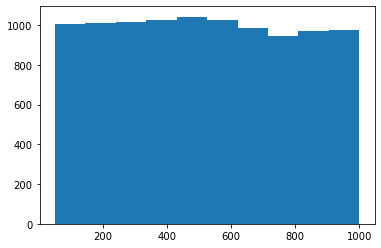

In [43]:
import random
import matplotlib.pyplot as plt
import numpy as np
mu, sigma, popsize = 50, 1000, 10000  
population = np.random.uniform(mu,sigma,popsize)
#print(population)
plt.hist(population)
plt.show()

In [44]:
np.mean(population)

520.1592914750504

In [45]:
np.std(population)

273.1477693047541

In [46]:
stdev=np.sqrt(np.sum((population-np.mean(population))**2)/len(population))
print(stdev)

273.1477693047541


Now pick 2 samples from the population of size 100 and 1000

In [47]:
rand100 = np.random.choice(range(10000), 100)
sample100 = np.array([population[i] for i in rand100])
print(sample100)

[310.75163508 518.310886   110.9158798  216.01402473 944.47429936
 406.87523356 789.99333782 623.78943014 348.7687316  801.22965768
 390.43411256 152.5353877  855.37294295 297.97908819  54.42519197
 315.68515734 158.94414036 136.06800575 180.36990464 702.6974137
 636.06751822 183.83434298 555.88362919 546.21123575 644.55276961
 125.83222284 152.96212653  65.49606703 185.03731011 782.73974398
 489.79921264 700.38534992 629.69269755 125.71187168 299.48603327
 633.94101686 625.99582847 727.19875305  92.29245614 767.43185848
 940.46572067 656.07883388 809.0920301  318.15165017 478.91055654
 864.36609852 557.98235857 853.60945896 961.57023164 744.47030491
 857.10366177 261.41522968 866.27394139 596.57412365 853.04751567
 816.22356735 271.7971744  477.96295346 479.21074723 769.61124224
 939.36782337 142.35681508 768.59301807 947.58624193 362.50254947
  59.11493361 316.86535996 311.01193245  55.03773577 342.61581459
 415.43962582 532.21144197 708.10952247 229.78382153 672.61923902
 775.692604

In [48]:
np.std(sample100)

278.7723348576047

In [49]:
# std with correction
np.std(sample100,ddof=1)

280.1767383799965

In [50]:
# sample std with correction is near to population std
stdev=np.sqrt(np.sum((sample100-np.mean(sample100))**2)/(len(sample100)-1))
print(stdev)

280.1767383799965


In [51]:
rand1000 = np.random.choice(range(10000), 1000)
sample1000 = np.array([population[i] for i in rand1000])
print(sample1000)

[747.11706987 394.3958238  728.00143847 743.07118187 951.36548211
 569.04756048 375.03919398 706.91342214 873.42388829 545.44148304
 980.12126691 940.46572067 968.81857188 461.13188523 675.35724499
 893.17804535 674.49198162 731.4317956  894.54553119 244.29491045
 106.42774032 467.96727426 109.63198093 867.59906454 334.72758914
 758.08161418  65.23930933 911.11312299 442.53701074 139.12148708
 340.1792992  402.9669206  570.30801781 930.20081636 700.51237074
 590.82172196 624.02334592 111.73201664 420.8332555  410.40754331
 944.47429936 960.84599413 202.84809983 455.44947364 570.88123937
 133.79713251 174.34869862 290.95119029 199.73149979 375.1067644
 739.33161731 242.40678026 810.89709509 441.59773494 221.16151969
 864.35738549 929.20695791 941.88082892 320.40462612 824.81984619
 867.54570568 790.3903146  729.13706961 252.60076263 212.31394779
 412.79687164 800.16995319 876.8585514  352.14595551 897.14901446
 177.47893981 555.12750829 284.52085683 423.35299624 262.21602575
 107.863150

Standard deviation increases (getting closer to the true std) as sample size gets larger. Applying Bessel's Correction (n-1) seems to help both 'biased' samples

In [52]:
print(np.std(sample1000))
print(np.std(sample1000,ddof=1))

270.35811923463575
270.49339976310864


### numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution, of the array elements. The standard deviation is computed for the flattened array by default, otherwise over the specified axis.<br>
**ddof int**, 
optional Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.

In [15]:

np.std(a)

1.118033988749895

In [17]:
np.std(a,ddof=1)

1.2909944487358056

## References
1. Standard Deviation and Variance available online https://www.mathsisfun.com/data/standard-deviation.html accessed on 17/11/2020
2. The Reasoning Behind Bessel’s Correction: n-1 https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9 accessed on 25/11/2020

## Task4
Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

### Data set 
The data set contains three classes of 50 instances each, where each class refers to a type of iris plant. Each class is linearly separable from the other two classes. The attribute information include sepal length, sepal width, and
petal length and petal width. All of them have the same unit, cm. 

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [14]:
X=iris.data
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
y=iris.target
#contains 50 samples for each type of Iris flower.
# In this table, 0 represents setosa, 1 represents versicolor, 2 represents virginica.
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
#data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#sns.pairplot(data1,hue="target")
#creating a dataframe from data set

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1

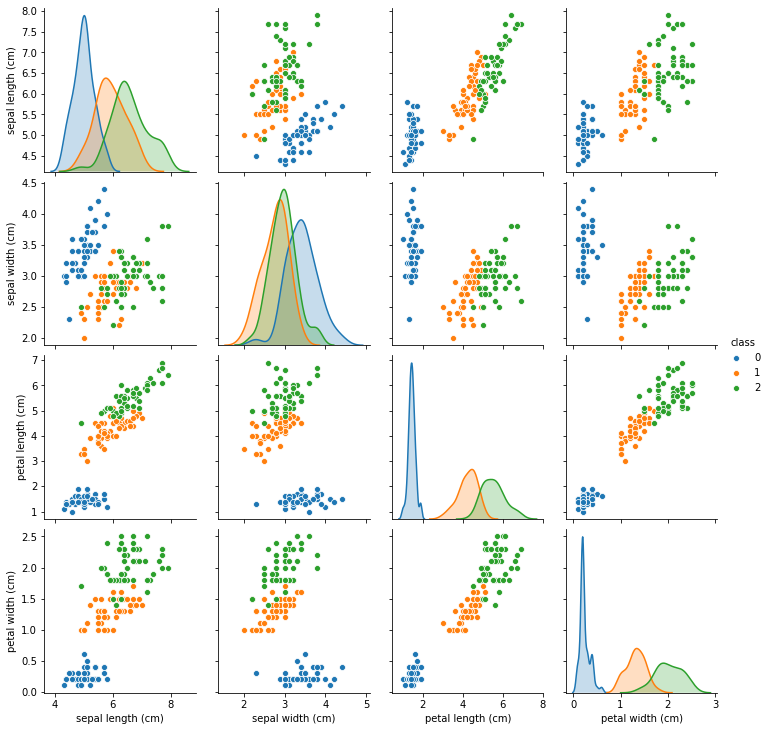

In [23]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = pd.Series(iris.target)
print(df)
sns.pairplot(df,hue="class")
plt.show()

In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans=KMeans(n_clusters=3)

In [62]:
KMmodel=kmeans.fit(iris.data)

In [63]:
KMmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [67]:
print('Centroids')
print(KMmodel.cluster_centers_)

Centroids
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


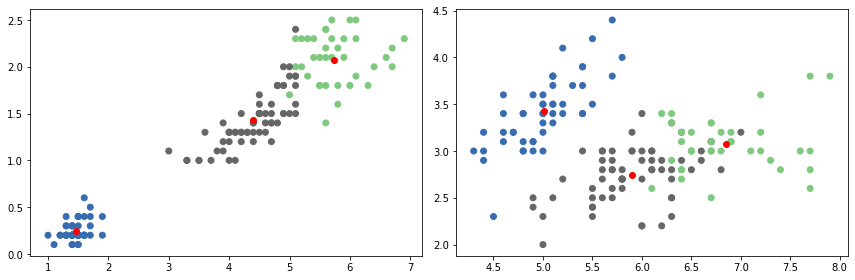

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(KMmodel.cluster_centers_[:, 2], KMmodel.cluster_centers_[:, 3], 'ro')
axes[0].scatter(df.iloc[:,2], df.iloc[:,3], c=KMmodel.labels_, cmap='Accent')


axes[1].plot(KMmodel.cluster_centers_[:, 0], KMmodel.cluster_centers_[:, 1], 'ro')
axes[1].scatter(df.iloc[:,0], df.iloc[:,1], c=KMmodel.labels_, cmap='Accent')


fig.tight_layout()

### Check Results

In [69]:
#check results
pd.crosstab(iris.target,KMmodel.labels_)

col_0,0,1,2
row_0,,,
0,0,50,0
1,2,0,48
2,36,0,14


In [70]:
df['k mean predicted label']= KMmodel.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,k mean predicted label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


### KNN Model
KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.



In [2]:
#import the load_iris function from dataset module
from sklearn.datasets import load_iris

In [3]:
#create object containing iris dataset and its attributes
iris=load_iris()

In [4]:
# print iris data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Each observation represents one flower and 4 columns represents 4 measurements.We can see the features(measures) under ‘data’ attribute, where as labels under ‘features_names’. As we can see below, labels/responses are encoded as 0,1 and 2. Because the features and repose should be numeric (Numpy arrays) for scikit-learn models and they should have a specific shape.

In [5]:
# name of four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# integer represent the types: 0 represents setosa, 1 represents versicolor, 2 represents virginica.
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
#there are 150 rows an 4 columns
print(iris.data.shape)

(150, 4)


Split the data and Train the Model.
Training and testing on the same data is not an optimal approach, so we do split the data into two pieces, training set and testing set. We use ‘train_test_split’ function to split the data. Optional parameter ‘test-size’ determines the split percentage. ‘random_state’ parameter makes the data split the same way every time you run. Since we are training and testing on different sets of data, the resulting testing accuracy will be a better estimate of how well the model is likely to perform on unseen data.

In [12]:
# splitting the data into training and testing 80% training and 20% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=4)

In [13]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Scikit-learn is carefully organized into modules, so that we can import the relevant classes easily. Import the class ‘KNeighborsClassifer’ from ‘neighbors’ module and Instantiate the estimator (‘estimator’ is scikit-learn’s term for a model). We are calling model as estimator because their primary role is to estimate unknown quantities.
In our example we are creating an instance (‘knn’ ) of the class ‘KNeighborsClassifer’, in other words we have created an object called ‘knn’ which knows how to do KNN classification once we provide the data. The parameter ‘n_neighbors’ is the tuning parameter/hyper parameter (k) . All other parameters are set to default values.
‘fit’ method is used to train the model on training data (X_train,y_train) and ‘predict’ method to do the testing on testing data (X_test). Choosing the optimal value of K is critical, so we fit and test the model for different values for K (from 1 to 25) using a for loop and record the KNN’s testing accuracy in a variable (scores).

In [16]:
#import the KNeighboursClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
#import metrics to check accuracy
from sklearn import metrics
# run from k=1 to k=20 and record the accuracy
k_range= range(1,21)
scores={}
score_list=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

Plot the relationship between the values of K and the corresponding testing accuracy using the matplotlib library. As we can see there is a raise and fall in the accuracy and it is quite typical when examining the model complexity with the accuracy. In general as the value of K increase there appears to be a raise in the accuracy and again it falls.
In general the Training accuracy rises as the model complexity increases, for KNN the model complexity is determined by the value of K. Larger K value leads to smoother decision boundary (less complex model). Smaller K leads to more complex model (may lead to overfitting). Testing accuracy penalizes models that are too complex(over fitting) or not complex enough(underfit). We get the maximum testing accuracy when the model has right level of complexity, in our case we can see that for a K value of 3 to 19 our model accuracy is 96.6%.

Text(0, 0.5, 'Testing Accuracy')

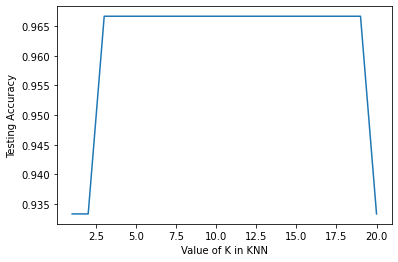

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the relation ship between K and the testing accuracy
plt.plot(k_range,score_list)
plt.xlabel('Value of K in KNN')
plt.ylabel('Testing Accuracy')


In [19]:
# for the final model we use k value 5
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [20]:
classes ={0:'setosa', 1:'versicolor', 2:'verginica'}
# making prediction on some unseen data
x_new=[[3,4,5,2],[5,4,2,2]]

y_predict=knn.predict(x_new)
for i in range(0,2):
    print(classes[y_predict[i]])

versicolor
setosa


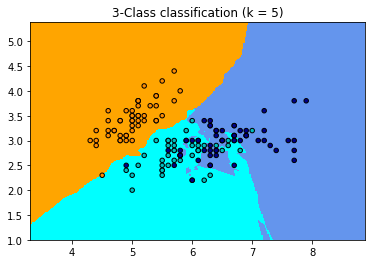

In [30]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors
X = iris.data[:, :2]
y = iris.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
#Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 5)")

plt.show()
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

### Conclusion

## References
1. Scikit Learn - KMeans Clustering Analysis with the Iris Data Set https://www.youtube.com/watch?v=asW8tp1qiFQ accessed on 10/12/2020
2. A study of pattern recognition of Iris flower based on Machine Learning [online avaiable from] https://core.ac.uk/download/pdf/38095118.pdf accessed on 10/12/2020
3. Machine Learning Tutorial Python - 13: K Means Clustering [online avaiable from] https://www.youtube.com/watch?v=EItlUEPCIzM  accessed on 15/12/2020
4. MachineLearning — KNN using scikit-learn [online avaiable from] https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75 accessed on 18/12/2020


# Additional resourses

##  Few other codes that i come across during my research I put those in the notebook to further look at them


In [22]:
x = 2 * 10 ** 200

r = x

# test the difference point, point+1, point-1
def test_diffs(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    #print(minimised)
    #print(below_min)
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2
    
    minimised, below_min = test_diffs(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = test_diffs(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')
# source:https://stackoverflow.com/a/64278569

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [23]:
a=4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
b=4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

print(a==b)

True


In [24]:
def sqrt(number,digits_after_decimal=100):

    original_number=number # the number 
    number=str(number) # change the number to string
    list=[]
    print(len(number))
    for a in range(len(number)):
        if number[a]=='.':
            decimal_point_locaiton=a
            break
        if a==len(number)-1:
            number+='.'
            decimal_point_locaiton=a+1
            
    if decimal_point_locaiton/2!=round(decimal_point_locaiton/2):
        number='0'+number
        decimal_point_locaiton+=1
    if len(number)/2!=round(len(number)/2):
        number+='0'
    number=number[:decimal_point_locaiton]+number[decimal_point_locaiton+1:]
    decimal_point_ans=int((decimal_point_locaiton-2)/2)+1
    for a in range(0,len(number),2):
        if number[a]!='0':
            list.append(eval(number[a:a+2]))
        else:
            try:
                list.append(eval(number[a+1]))
            except IndexError:
                pass
    p=0
    c=list[0]
    x=0
    ans=''
    for a in range(len(list)):
        while c>=(20*p+x)*(x):
            x+=1
        y=(20*p+x-1)*(x-1)
        p=p*10+x-1
        ans+=str(x-1)
        c-=y
        try:
            c=c*100+list[a+1]
        except IndexError:
            c=c*100
    while c!=0:
        x=0
        while c>=(20*p+x)*(x):
            x+=1
        y=(20*p+x-1)*(x-1)
        p=p*10+x-1
        ans+=str(x-1)
        c-=y
        c=c*100
        if len(ans)-decimal_point_ans>=digits_after_decimal:
                break
    ans=ans[:decimal_point_ans]+'.'+ans[decimal_point_ans:]

    return ans
#Source: https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2
#source:https://stackoverflow.com/a/7003789

In [25]:
sqrt(2,)

1


'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'